In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook kagglehub
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.8 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [3]:
import kagglehub

path = kagglehub.dataset_download("samithsachidanandan/human-face-emotions")

path

Using Colab cache for faster access to the 'human-face-emotions' dataset.


'/kaggle/input/human-face-emotions'

In [4]:
path

'/kaggle/input/human-face-emotions'

In [18]:
angries = (path/'Data/Angry').ls().sorted()
fears = (path/'Data'/'Fear').ls().sorted()
surprises = (path/'Data'/'Suprise').ls().sorted()
sads = (path/'Data'/'Sad').ls().sorted()
happies = (path/'Data'/'Happy').ls().sorted()
angries

(#10148) [Path('Data/Angry/0.png'),Path('Data/Angry/1.png'),Path('Data/Angry/10.png'),Path('Data/Angry/10002.png'),Path('Data/Angry/10005903.png'),Path('Data/Angry/10016.png'),Path('Data/Angry/10037.png'),Path('Data/Angry/10038.png'),Path('Data/Angry/10047185.png'),Path('Data/Angry/10052.png'),Path('Data/Angry/10057.png'),Path('Data/Angry/10063.png'),Path('Data/Angry/10065.png'),Path('Data/Angry/10069.png'),Path('Data/Angry/10069404.png'),Path('Data/Angry/100730703.png'),Path('Data/Angry/1007604.png'),Path('Data/Angry/10079.png'),Path('Data/Angry/10095.png'),Path('Data/Angry/10100.png')...]

In [40]:
im3_path = angries[5]
im3 = Image.open(im3_path)
im3.size



(48, 48)

In [25]:
len(angries)

10148

In [4]:
data_path = '/kaggle/input/human-face-emotions/Data'

In [5]:
dls = ImageDataLoaders.from_folder(
    data_path,
    valid_pct=0.2,
    item_tfms=Resize(48))

In [7]:
dls.items

[Path('/kaggle/input/human-face-emotions/Data/Happy/26456.png'),
 Path('/kaggle/input/human-face-emotions/Data/Sad/34319.png'),
 Path('/kaggle/input/human-face-emotions/Data/Fear/956483204.png'),
 Path('/kaggle/input/human-face-emotions/Data/Sad/33838.png'),
 Path('/kaggle/input/human-face-emotions/Data/Happy/116870250.png'),
 Path('/kaggle/input/human-face-emotions/Data/Angry/1340.png'),
 Path('/kaggle/input/human-face-emotions/Data/Sad/896437065.png'),
 Path('/kaggle/input/human-face-emotions/Data/Fear/11381.png'),
 Path('/kaggle/input/human-face-emotions/Data/Happy/8490.png'),
 Path('/kaggle/input/human-face-emotions/Data/Sad/19076.png'),
 Path('/kaggle/input/human-face-emotions/Data/Sad/26586.png'),
 Path('/kaggle/input/human-face-emotions/Data/Happy/188414984.png'),
 Path('/kaggle/input/human-face-emotions/Data/Happy/9765251.png'),
 Path('/kaggle/input/human-face-emotions/Data/Fear/693548735.png'),
 Path('/kaggle/input/human-face-emotions/Data/Suprise/41550220.png'),
 Path('/kaggl

In [8]:
learn = vision_learner(
    dls,
    resnet18,
    metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 58.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.475103,1.392313,0.582706,05:31


epoch,train_loss,valid_loss,error_rate,time
0,1.003477,0.933691,0.365344,03:17


epoch,train_loss,valid_loss,error_rate,time
0,1.003477,0.933691,0.365344,03:17
1,0.627522,0.589224,0.208901,03:09
2,0.245828,0.369128,0.105847,03:19
3,0.089288,0.362399,0.093409,03:23


In [11]:
learn.dls.vocab

['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']

In [14]:
im = PILImage.create('/content/Angry1.png')
learn.predict(im)

('Sad', tensor(3), tensor([0.3499, 0.0212, 0.0506, 0.5577, 0.0205]))

Sooo, no. Model confuses angry with sad. Let's tune some more.

In [17]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.086537,0.461244,0.098401,03:29


epoch,train_loss,valid_loss,error_rate,time
0,0.259700,0.445657,0.125137,03:32
1,0.094138,0.395563,0.094932,03:29


Further fine tuning with resnet18 doens't seem to improve the error rate. So stopping here.

In [15]:
interpretation = ClassificationInterpretation.from_learner(learn)

<bound method ClassificationInterpretation.confusion_matrix of <fastai.interpret.ClassificationInterpretation object at 0x7883a815d730>>

Lets look at the confusion matrix.

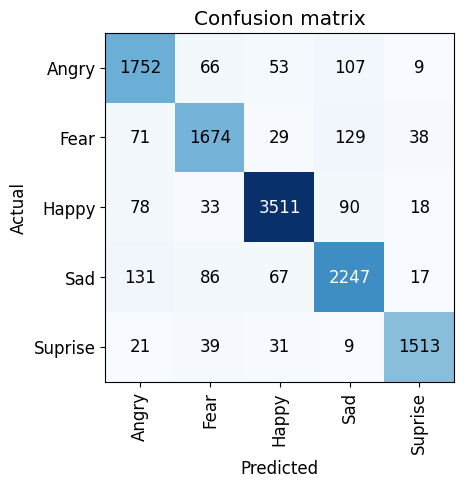

In [18]:
interpretation.plot_confusion_matrix()

Could be better maybe? Let's try with more layers - resnet34

In [19]:
learn34 = vision_learner(
    dls,
    resnet34,
    metrics=error_rate)
learn34.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 170MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.450567,1.360839,0.566122,03:38


epoch,train_loss,valid_loss,error_rate,time
0,0.898991,0.860075,0.336407,03:37


Confusion matrix:

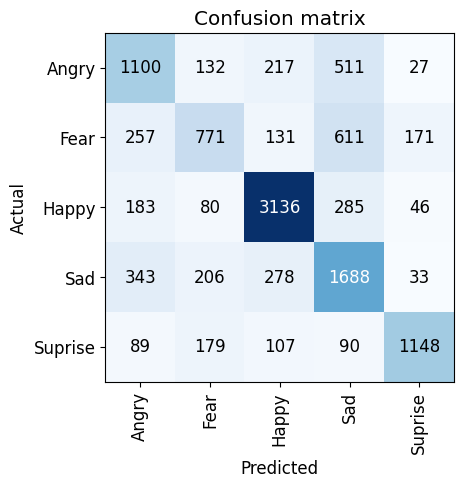

In [20]:
intrpr34 = ClassificationInterpretation.from_learner(learn34)
intrpr34.plot_confusion_matrix()

Needs more tuning.

In [21]:
learn34.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.774020,0.830873,0.316017,03:36


epoch,train_loss,valid_loss,error_rate,time
0,0.710247,0.686469,0.247821,03:35
1,0.283954,0.431999,0.138844,03:33


Ok. Error rate is better now.

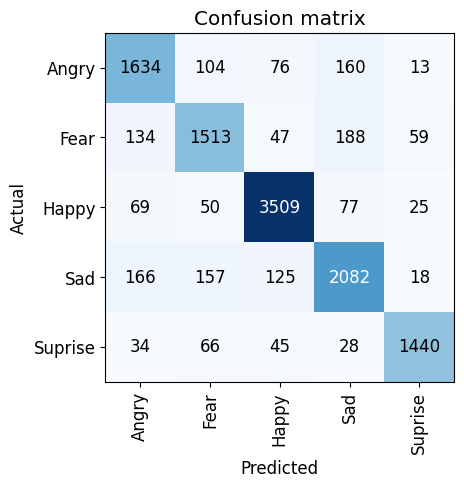

In [22]:
intrpr34.plot_confusion_matrix()

Confusion matrix looks worse than resnet18. Maybe a bit more tuning

In [23]:
learn34.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.173022,0.506065,0.133091,03:33


epoch,train_loss,valid_loss,error_rate,time
0,0.381636,0.507341,0.164819,03:29
1,0.139416,0.358587,0.093578,03:36


Better now I guess?

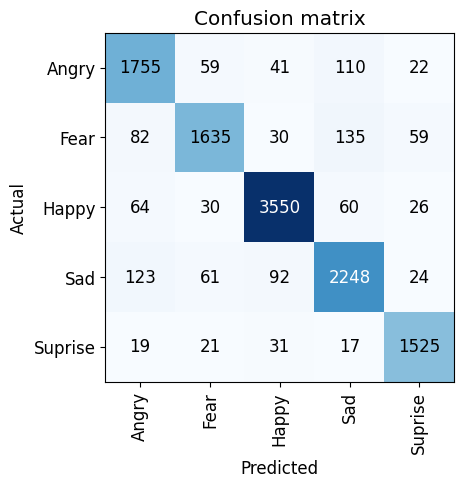

In [24]:
intrpr34.plot_confusion_matrix()

Lets try that image again.

In [25]:
im = PILImage.create('/content/Angry1.png')
learn34.predict(im)

('Angry', tensor(0), tensor([0.4034, 0.0101, 0.3890, 0.1864, 0.0112]))

OK. While the confusion matrix stayed the same, classification seems to have improved. Maybe some images are borderline expressions ? Deeper NN maybe does a bit better on clear expressions